# Retail Challenge

### **Contexto**

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

### **Objetivos**

Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando la metodología RFM (Recencia, Frecuencia, Valor Monetario). A través de procesos como lo son:

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del cliente a través del tiempo (CTLV)

La metodología de Segmentación de Clientes es una herramienta poderosa que se usa en diferentes industrias, desde la banca, turismo y la industria de consumo masivo. Cada vez las empresas quieren conocer mejor a sus clientes por medio de las diferentes fuentes de datos que
tienen disponibles con la información de estos clientes.


# Índice

- [Descripción de los datos](#Descripción-de-los-datos)

- [Analisis Estadistico Descriptivo](#Analisis-Estadistico-Descriptivo)

- [Visualizaciones](#Visualizaciones)

- [Reporte de resultados](#Reporte-de-resultados)


# Descripción de los datos

- INVOICE_NO : Número de serie de factura
- STOCK_CODE : Número serie del producto
- DESCRIPTION : Descripción del producto
- QUANTITY : Cantidad de compra del producto
- INVOICE_DATE : Fecha de facturación
- UNIT_PRICE : Precio unitario
- CUSTOMER_ID : ID del cliente
- REGION : País de origen de la compra

# Analisis Estadistico Descriptivo

## Carga de dataset.

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go

In [51]:
df = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')

In [52]:
df.sample(10)

INVOICE_NO STOCK_CODE                         DESCRIPTION  QUANTITY  \
67926      541848      21913      VINTAGE SEASIDE JIGSAW PUZZLES         1   
145139     548868      23126           DOLLCRAFT GIRL AMELIE KIT         4   
194182     553553      23298                      SPOTTY BUNTING        12   
532766     580997      48194                      DOORMAT HEARTS         1   
259691     559704      22329  ROUND CONTAINER SET OF 5 RETROSPOT        12   
128467     547339     84406B                                   ?      -450   
487478     577768      23212   HEART WREATH DECORATION WITH BELL         1   
25785      538397      22661     CHARLOTTE BAG DOLLY GIRL DESIGN       100   
144132     548728     16156S              WRAP PINK FAIRY CAKES         25   
287688     562113      20682    RED RETROSPOT CHILDRENS UMBRELLA         1   

            INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
67926   23/01/2020 13:31        3.75      17611.0  United Kingdom  
145139  04/04/2020 14:28        4.95      13015.0  United Kingdom  
194182  17/05/2020 16:32        4.95      16156.0  United Kingdom  
532766  06/12/2020 17:23        8.25      15023.0  United Kingdom  
259691  12/07/2020 09:54        1.65      12669.0          France  
128467  22/03/2020 11:51        0.00          NaN  United Kingdom  
487478  21/11/2020 15:18        2.46          NaN  United Kingdom  
25785   12/12/2019 11:44        0.72      12753.0           Japan  
144132  04/04/2020 09:55        0.42      13198.0  United Kingdom  
287688  02/08/2020 16:11        6.63          NaN  United Kingdom

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.
<-TODO-> Comentar porque se hacen estas transformaciones

In [54]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('object')

In [55]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [56]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 
<-TODO-> Comentar los hallazgos del análisis como outliers, datos extraños etc

In [57]:
df.describe().T

count                           mean                  min  \
QUANTITY      541909.0                        9.55225             -80995.0   
INVOICE_DATE    541909  2020-07-04 08:55:02.927097344  2019-12-01 08:26:00   
UNIT_PRICE    541909.0                       4.611114            -11062.06   

                              25%                  50%                  75%  \
QUANTITY                      1.0                  3.0                 10.0   
INVOICE_DATE  2020-03-28 11:34:00  2020-07-19 17:17:00  2020-10-19 11:27:00   
UNIT_PRICE                   1.25                 2.08                 4.13   

                              max         std  
QUANTITY                  80995.0  218.081158  
INVOICE_DATE  2020-12-09 12:50:00         NaN  
UNIT_PRICE                38970.0   96.759853

In [58]:
df.select_dtypes('object').describe().T

count  unique                                 top    freq
INVOICE_NO     541909   25900                              573585    1114
STOCK_CODE     541909    4070                              85123A    2313
DESCRIPTION    540455    4214  WHITE HANGING HEART T-LIGHT HOLDER    2369
CUSTOMER_ID  406829.0  4372.0                             17841.0  7983.0
REGION         541909      38                      United Kingdom  495478

<Axes: xlabel='QUANTITY'>

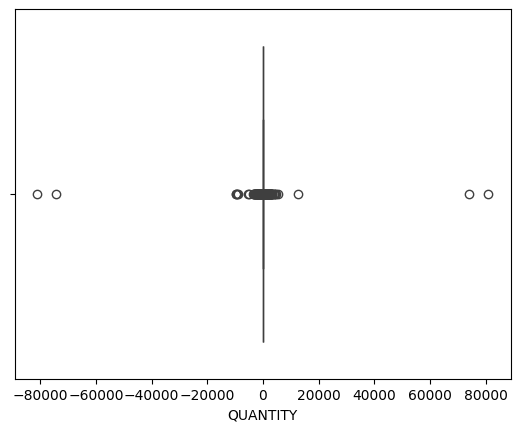

In [59]:
sns.boxplot(x=df['QUANTITY'])

<Axes: xlabel='UNIT_PRICE'>

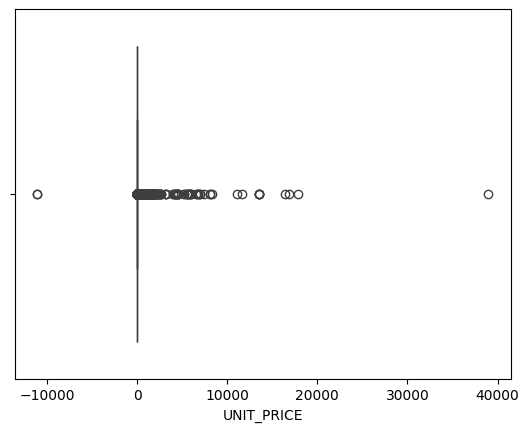

In [60]:
sns.boxplot(x=df['UNIT_PRICE'])

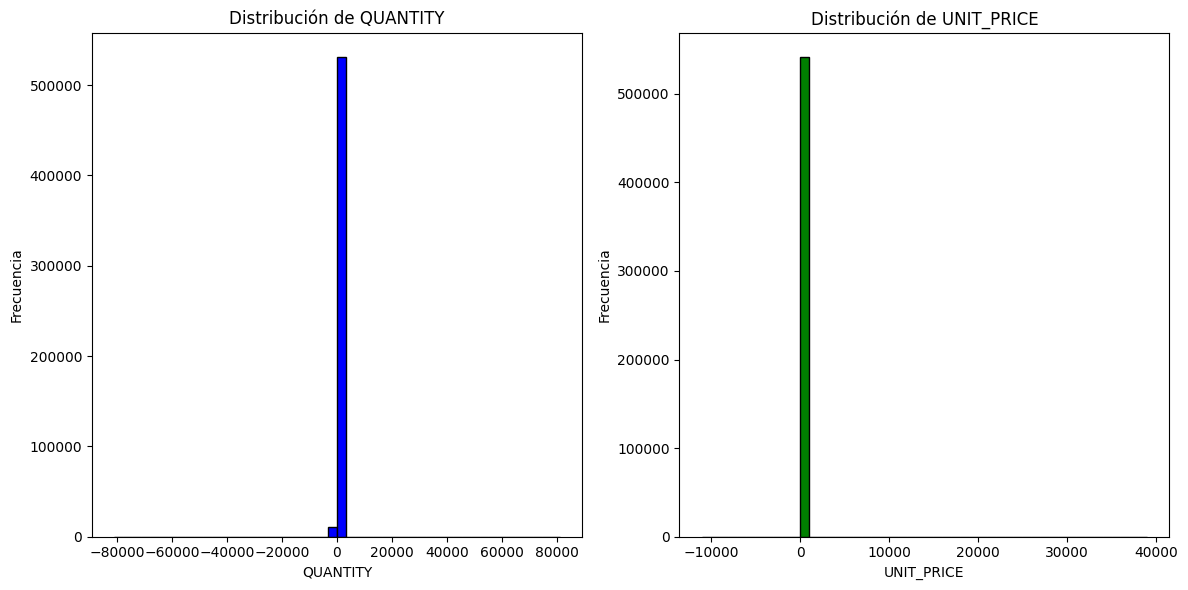

In [61]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

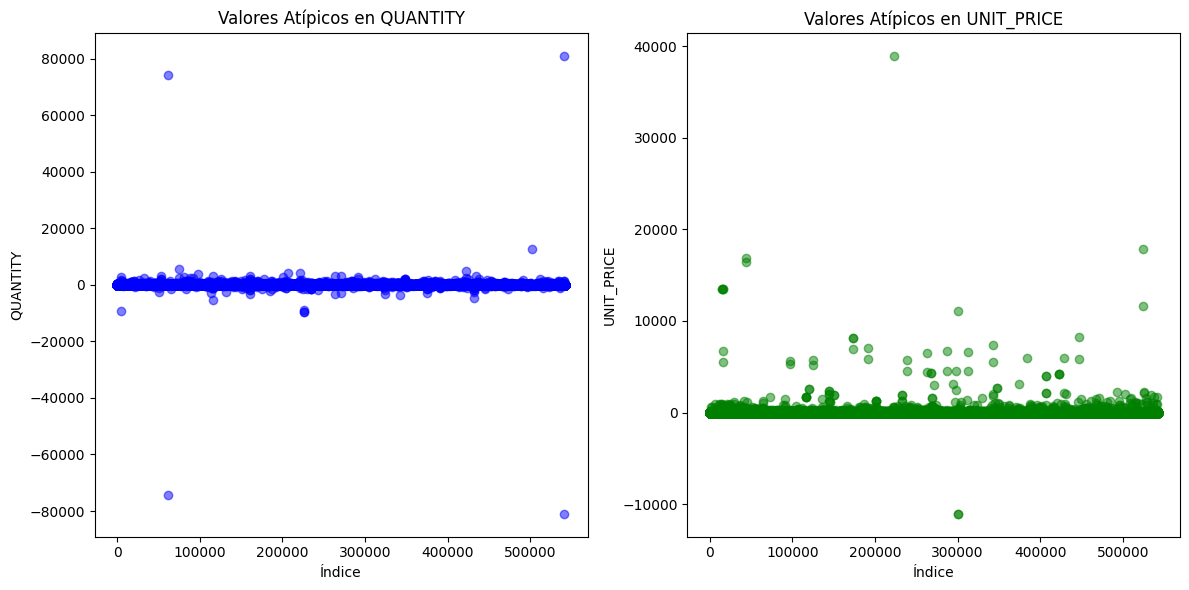

In [62]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

## Tratamiendo de valores ausentes.
<-TODO-> Comentar porque se borran algunos datos como 'unknown' de descripción y negativos de 'QUANTITY' y 'UNIT_PRICE'

In [63]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [64]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

In [65]:
df[df['DESCRIPTION']=='unknown']

INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE  \
622        536414      22139     unknown        56 2019-12-01 11:52:00   
1970       536545      21134     unknown         1 2019-12-01 14:32:00   
1971       536546      22145     unknown         1 2019-12-01 14:33:00   
1972       536547      37509     unknown         1 2019-12-01 14:33:00   
1987       536549     85226A     unknown         1 2019-12-01 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581     unknown        -2 2020-12-07 18:26:00   
535326     581203      23406     unknown        15 2020-12-07 18:31:00   
535332     581209      21620     unknown         6 2020-12-07 18:35:00   
536981     581234      72817     unknown        27 2020-12-08 10:33:00   
538554     581408      85175     unknown        20 2020-12-08 14:06:00   

        UNIT_PRICE CUSTOMER_ID          REGION  
622            0.0         NaN  United Kingdom  
1970           0.0         NaN  United Kingdom  
1971           0.0         NaN  United Kingdom  
1972           0.0         NaN  United Kingdom  
1987           0.0         NaN  United Kingdom  
...            ...         ...             ...  
535322         0.0         NaN  United Kingdom  
535326         0.0         NaN  United Kingdom  
535332         0.0         NaN  United Kingdom  
536981         0.0         NaN  United Kingdom  
538554         0.0         NaN  United Kingdom  

[1501 rows x 8 columns]

In [66]:
100*df[df['DESCRIPTION']=='unknown']['INVOICE_NO'].count()/df.shape[0]

0.2769837740284808

In [67]:
df.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

In [68]:
df[df['CUSTOMER_ID'].isna()]

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
1443       536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444       536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544      21786               POLKADOT RAIN HAT          4   
1446       536544      21787            RAIN PONCHO RETROSPOT         2   
1447       536544      21790               VINTAGE SNAP CARDS         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          JUMBO BAG RED RETROSPOT         5   
541537     581498     85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538     581498      85150    LADIES & GENTLEMEN METAL SIGN         1   
541539     581498      85174                S/4 CACTI CANDLES         1   
541540     581498        DOT                   DOTCOM POSTAGE         1   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
1443   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1444   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1445   2019-12-01 14:32:00        0.85         NaN  United Kingdom  
1446   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
1447   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
...                    ...         ...         ...             ...  
541536 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541537 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541538 2020-12-09 10:26:00        4.96         NaN  United Kingdom  
541539 2020-12-09 10:26:00       10.79         NaN  United Kingdom  
541540 2020-12-09 10:26:00     1714.17         NaN  United Kingdom  

[133579 rows x 8 columns]

In [69]:
100*df['CUSTOMER_ID'].isna().sum()/df.shape[0]

24.71817589672988

In [70]:
#Remplazamos los 'unknown' por 0'
df['CUSTOMER_ID'].fillna(0, inplace=True)

In [71]:
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

## Tratamiento de duplicados.

In [72]:
df = df.drop_duplicates().reset_index(drop=True)

In [73]:
df.duplicated().sum()

0

### Quantity

In [74]:
df[df['QUANTITY'] < -2000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
4216      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
50161      540564      22617                  mouldy thrown away.     -2600   
60844     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
112219     545990      84598                                check     -3000   
114433     546152     72140F                           throw away     -5368   
129826     547560      72732               thrown away-can't sell     -2472   
158057    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
182747     552733      23059                    Thrown away-rusty     -2376   
222766     556687      23003         Printing smudges/thrown away     -9058   
222767     556690      23005         printing smudges/thrown away     -9600   
222768     556691      23005         printing smudges/thrown away     -9600   
260766     560039      20713         wrongly marked. 23343 in box     -3100   
371215     569466      23270               incorrect stock entry.     -2880   
426346     573593    79323LP                Unsaleable destroyed.     -2618   
426347     573594     79323P                Unsaleable destroyed.     -2003   
426349     573596     79323W                Unsaleable destroyed.     -4830   
533660    C581484      23843           PAPER CRAFT  LITTLE BIRDIE    -80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
4216   2019-12-02 14:23:00        0.03      15838.0  United Kingdom  
50161  2020-01-10 10:36:00        0.00          0.0  United Kingdom  
60844  2020-01-18 10:17:00        1.04      12346.0  United Kingdom  
112219 2020-03-08 13:07:00        0.00          0.0  United Kingdom  
114433 2020-03-09 17:25:00        0.00          0.0  United Kingdom  
129826 2020-03-23 17:28:00        0.00          0.0  United Kingdom  
158057 2020-04-18 13:08:00        2.10      15749.0  United Kingdom  
182747 2020-05-11 10:48:00        0.00          0.0  United Kingdom  
222766 2020-06-14 10:36:00        0.00          0.0  United Kingdom  
222767 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
222768 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
260766 2020-07-14 14:27:00        0.00          0.0  United Kingdom  
371215 2020-10-04 11:42:00        0.00          0.0  United Kingdom  
426346 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426347 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426349 2020-10-31 15:17:00        0.00          0.0  United Kingdom  
533660 2020-12-09 09:27:00        2.08      16446.0  United Kingdom

In [75]:
100*df[df['QUANTITY'] <=0]['INVOICE_NO'].count()/df.shape[0]

1.8096199125462495

In [76]:
#Eliminamos los datos dado que el porcentage es menor
df.drop(df[df['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)

In [77]:
df[df['QUANTITY'] > 3000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
52005      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
60839      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
96207      544612      22053                EMPIRE DESIGN ROSETTE      3906   
158456     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
203564     554868      22197                 SMALL POPCORN HOLDER      4300   
260767     560040      23343                  came coded as 20713      3100   
267686     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
416713     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
495915     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
533659     581483      23843           PAPER CRAFT  LITTLE BIRDIE     80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
52005  2020-01-11 12:55:00        2.10      15749.0  United Kingdom  
60839  2020-01-18 10:01:00        1.04      12346.0  United Kingdom  
96207  2020-02-22 10:43:00        0.82      18087.0  United Kingdom  
158456 2020-04-18 13:20:00        2.10      15749.0  United Kingdom  
203564 2020-05-27 10:52:00        0.72      13135.0  United Kingdom  
260767 2020-07-14 14:28:00        0.00          0.0  United Kingdom  
267686 2020-07-19 17:04:00        0.06      14609.0  United Kingdom  
416713 2020-10-27 12:26:00        0.21      12901.0  United Kingdom  
495915 2020-11-25 15:57:00        0.00      13256.0  United Kingdom  
533659 2020-12-09 09:15:00        2.08      16446.0  United Kingdom

### Unit Price

In [78]:
df[df['UNIT_PRICE'] <= 0].sample(20)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
164507     550951     84531A                             returned         2   
158451     550460     47556B  did  a credit  and did not tick ret      1300   
40855      539856      22526            WHEELBARROW FOR CHILDREN          1   
103126     545176      22359               GLASS JAR KINGS CHOICE         2   
239469     558340     85123A   WHITE HANGING HEART T-LIGHT HOLDER         1   
190781     553521      22665    RECIPE BOX BLUE SKETCHBOOK DESIGN         2   
40868      539856      22367      CHILDRENS APRON SPACEBOY DESIGN         2   
14045      537534      22432              WATERING CAN PINK BUNNY         1   
310062     564530      22679        FRENCH BLUE METAL DOOR SIGN 4         3   
190787     553521      22626                 BLACK KITCHEN SCALES         1   
517779     580549     84876B                                found        66   
40846      539856      22676        FRENCH BLUE METAL DOOR SIGN 1         5   
190770     553521      22692          DOORMAT WELCOME TO OUR HOME         1   
190771     553521      22684        FRENCH BLUE METAL DOOR SIGN 9         2   
191153     553539      22676        FRENCH BLUE METAL DOOR SIGN 1         4   
190802     553521      22356          CHARLOTTE BAG PINK POLKADOT         1   
190769     553521      48184                DOORMAT ENGLISH ROSE          1   
40843      539856      22678        FRENCH BLUE METAL DOOR SIGN 3         2   
190803     553521      22301         COFFEE MUG CAT + BIRD DESIGN         1   
191145     553539      22682        FRENCH BLUE METAL DOOR SIGN 7         1   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
164507 2020-04-21 16:15:00         0.0          0.0  United Kingdom  
158451 2020-04-18 13:18:00         0.0          0.0  United Kingdom  
40855  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
103126 2020-02-28 14:19:00         0.0          0.0  United Kingdom  
239469 2020-06-28 14:01:00         0.0          0.0  United Kingdom  
190781 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
40868  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
14045  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
310062 2020-08-25 14:57:00         0.0          0.0  United Kingdom  
190787 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
517779 2020-12-05 09:54:00         0.0          0.0  United Kingdom  
40846  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
190770 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
190771 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
191153 2020-05-17 15:27:00         0.0          0.0  United Kingdom  
190802 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
190769 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
40843  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
190803 2020-05-17 14:35:00         0.0          0.0  United Kingdom  
191145 2020-05-17 15:27:00         0.0          0.0  United Kingdom

In [79]:
100*df[df['UNIT_PRICE'] <= 0]['INVOICE_NO'].count()/df.shape[0]

0.109999695502573

In [80]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)

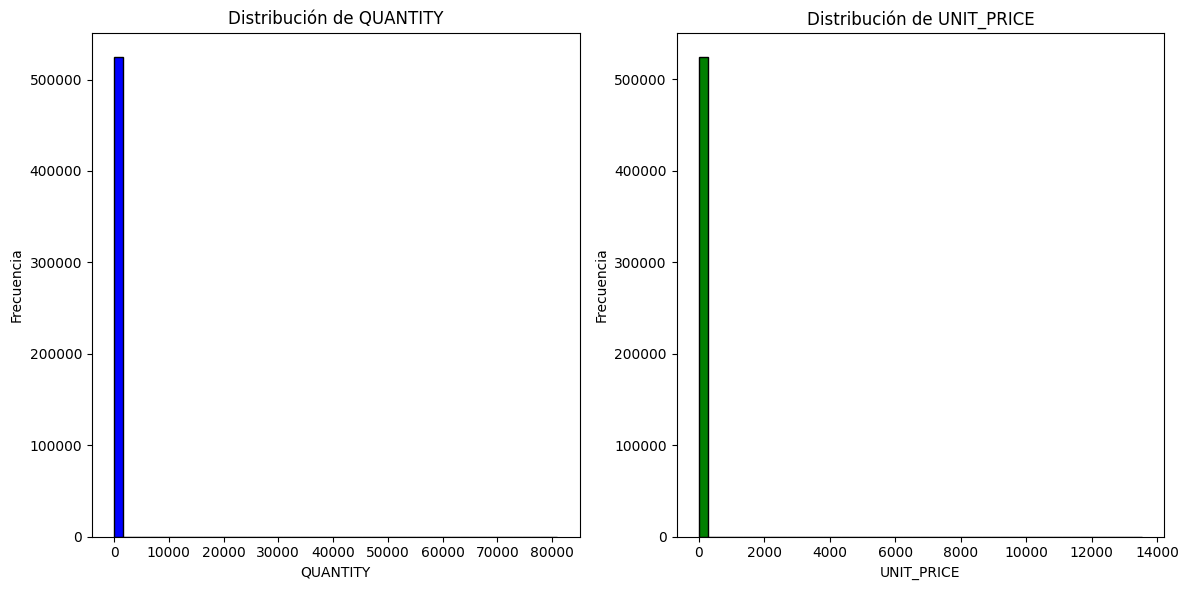

In [81]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

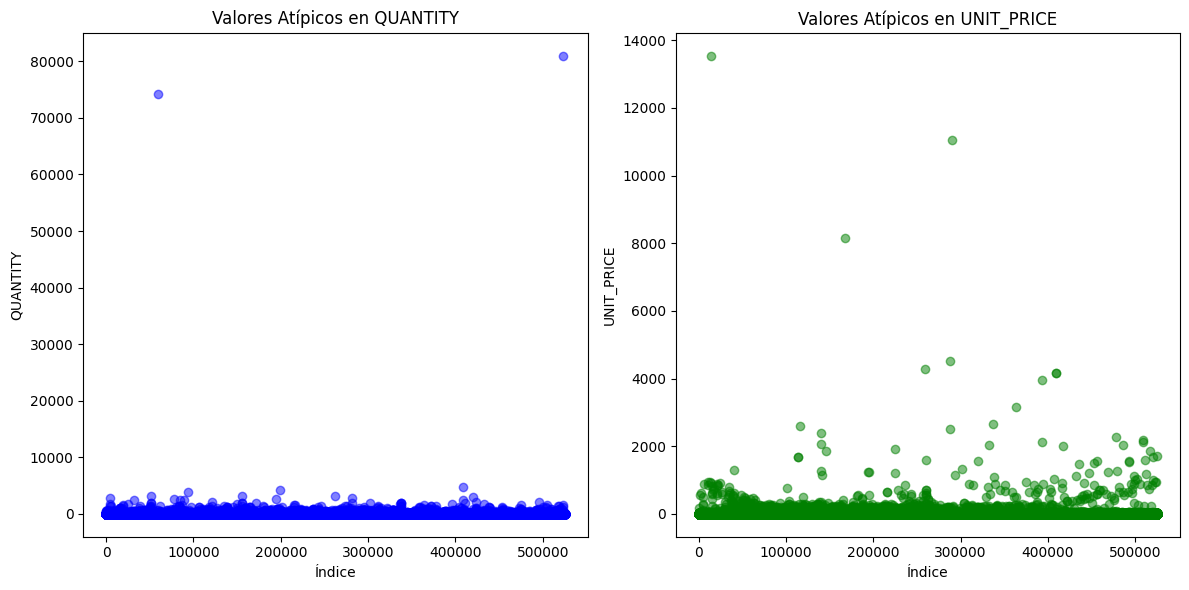

In [82]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

## Segmentacion por grupos.

In [83]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
287307     562417      22355        CHARLOTTE BAG SUKI DESIGN         1   
198355     554160      21129            SILVER FISHING GNOME          1   
381973     570232      22666  RECIPE BOX PANTRY YELLOW DESIGN         6   
175616     552188      22631         CIRCUS PARADE LUNCH BOX         12   
358537     568513      21131              GOLD STANDING GNOME         1   
348461     567673      16237             SLEEPING CAT ERASERS         2   
110772     545872      22386          JUMBO BAG PINK POLKADOT         2   
521570     580729      21981     PACK OF 12 WOODLAND TISSUES          6   
76317      542719      21166       COOK WITH WINE METAL SIGN          1   
374248     569652      22470            HEART OF WICKER LARGE         6   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  \
287307 2020-08-04 16:32:00        1.63          0.0  United Kingdom   
198355 2020-05-23 11:49:00        6.95      17841.0  United Kingdom   
381973 2020-10-09 13:58:00        2.95      14040.0  United Kingdom   
175616 2020-05-06 14:01:00        1.95      12394.0         Belgium   
358537 2020-09-27 12:36:00        4.25      13555.0  United Kingdom   
348461 2020-09-21 15:43:00        0.42          0.0  United Kingdom   
110772 2020-03-07 14:51:00        1.95      15752.0  United Kingdom   
521570 2020-12-05 17:24:00        0.83          0.0  United Kingdom   
76317  2020-01-31 14:18:00        1.95      17619.0  United Kingdom   
374248 2020-10-05 12:51:00        2.95      15628.0  United Kingdom   

        TOTAL_REVENUE  MONTH  YEAR  DAY  
287307           1.63      8  2020    1  
198355           6.95      5  2020    5  
381973          17.70     10  2020    4  
175616          23.40      5  2020    2  
358537           4.25      9  2020    6  
348461           0.84      9  2020    0  
110772           3.90      3  2020    5  
521570           4.98     12  2020    5  
76317            1.95      1  2020    4  
374248          17.70     10  2020    0

# Métricas
<-TODO-> Revisar el formato de los gráficos para que concuerde con el formato de la pagina web

##  Frequency. 
---

Esta métrica se puede construir contando el número de compras que un cliente ha hecho, puede ser por compra, o por producto, depende del enfoque que uno le 
quiera dar

---
<-TODO->Agregar la columna frequency para el clusterizado


In [84]:
#df['FREQUENCY']=Counter(map(lambda x: x[0], df['CUSTOMER_ID']))

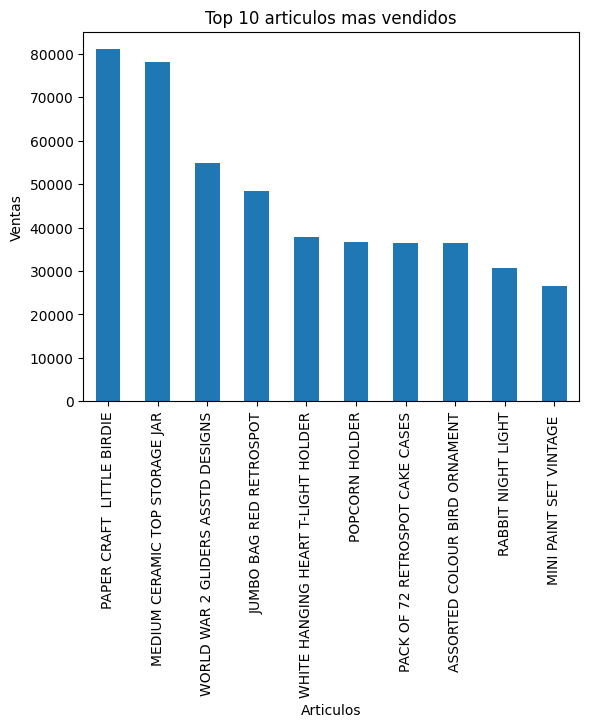

In [85]:
# ARTICULOS MAS VENDIDOS
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos mas vendidos",ylabel="Ventas",xlabel="Articulos")
plt.show()

In [86]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='QUANTITY',barmode='group',title='Top 10 articulos mas vendidos')
fig_coun.show()

In [87]:
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('int')
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('str')

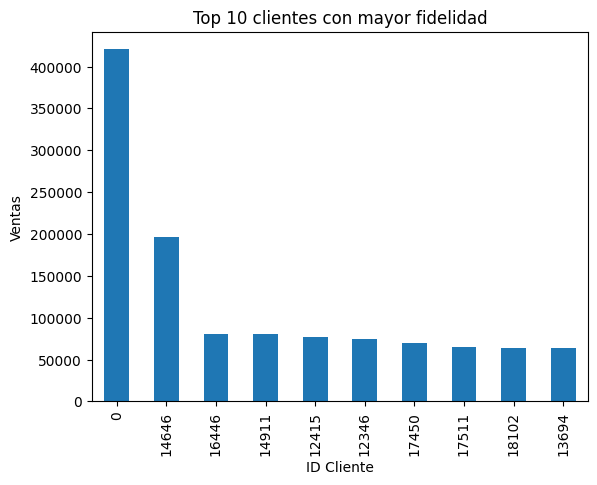

In [88]:
#CLIENTES CON MAS COMPRAS
top_10_products = df.groupby('CUSTOMER_ID')['QUANTITY'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor fidelidad",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

In [89]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='QUANTITY',barmode='group',title='Top 10 clientes con mayor fidelidad')
fig_coun.show()

## Frecuencia por orden de compra

In [90]:
df_freq=df[df['CUSTOMER_ID']!='0']

In [91]:
df_frequency=df_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
fig = px.histogram(df_frequency, x="INVOICE_NO")
fig.show()

##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

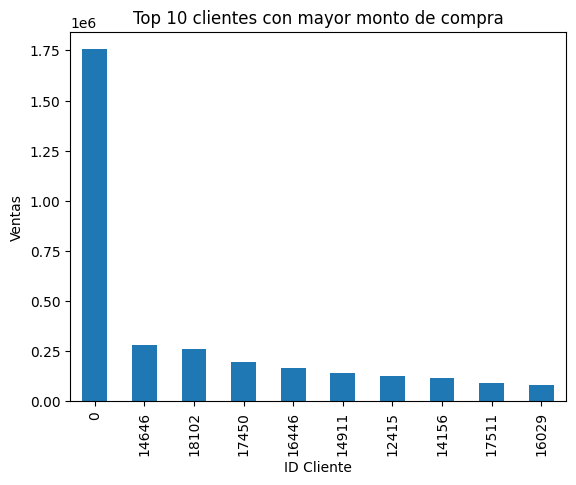

In [92]:
#CLIENTES QUE MAYOR GANANCIA DEJAN
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="CUSTOMER_ID",title="Top 10 clientes con mayor monto de compra",ylabel="Ventas",xlabel="ID Cliente")
plt.show()

In [93]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 clientes con mayor monto de compra')
fig_coun.show()

### Histograma de ganancias

In [94]:
df_mon=df[df['CUSTOMER_ID']!='0']

In [95]:
df_monetary=df_mon.groupby(['CUSTOMER_ID'],as_index=False)['TOTAL_REVENUE'].sum()
fig = px.histogram(df_monetary, x="TOTAL_REVENUE")
fig.show()

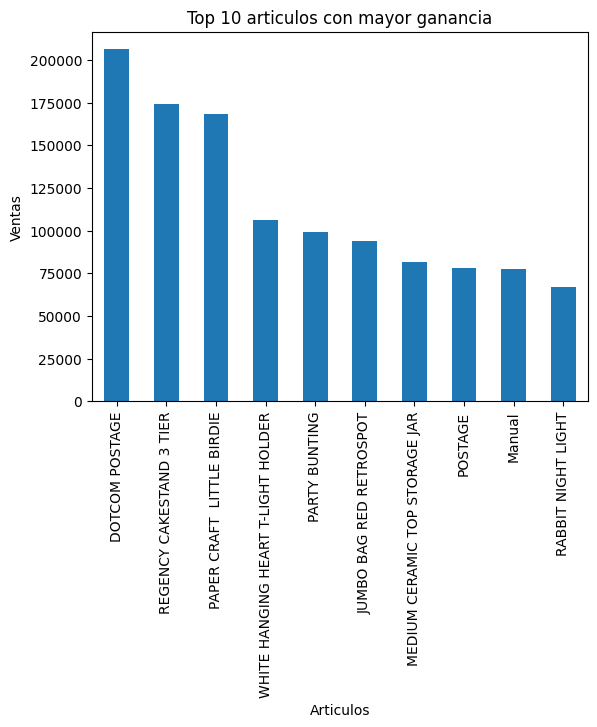

In [96]:
#ARTICULOS CON MAYOR GANANCIA
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

top_10_products.plot(kind="bar",x="DESCRIPTION",title="Top 10 articulos con mayor ganancia",ylabel="Ventas",xlabel="Articulos")
plt.show()

In [97]:
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 articulos con mayor ganancia')
fig_coun.show()

## Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.

In [98]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
1 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   

   MONTH  YEAR  DAY  
0     12  2019    6  
1     12  2019    6  
2     12  2019    6  
3     12  2019    6  
4     12  2019    6

In [99]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
orders_per_month.sort_index(ascending=False,inplace=True)
print(orders_per_month.head(12))
print()
mean_orders= orders_per_month['Orders_per_user'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
12            1266    1459243.060      1152.640648
11            1665    1503866.780       903.223291
10            1365    1151263.730       843.416652
9             1267    1056435.192       833.808360
8              936     757841.380       809.659594
7              950     718076.121       755.869601
6              992     760547.010       766.680454
5             1057     769296.610       727.811362
4              857     536968.491       626.567667
3              975     716215.260       734.579754
2              759     522545.560       688.465823
1              742     689811.610       929.665243

Promedio de compra por mes: 814.3657041079845


In [100]:
fig_coun=px.bar(orders_per_month,x=orders_per_month.index,y='TOTAL_REVENUE',barmode='group',title='Ganancias por mes')
fig_coun.show()

In [101]:
fig = px.histogram(orders_per_month, x="Orders_per_user")
fig.show()

### Dias sin comprar

In [102]:
df_recency=df.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
df_recency['days_since_last_sale']=(datetime.now()-df_recency['INVOICE_DATE']).dt.days
df_recency

CUSTOMER_ID        INVOICE_DATE  days_since_last_sale
0              0 2020-12-09 10:26:00                  1302
1          12346 2020-01-18 10:01:00                  1628
2          12347 2020-12-07 15:52:00                  1303
3          12348 2020-09-25 13:13:00                  1376
4          12349 2020-11-21 09:51:00                  1320
...          ...                 ...                   ...
4334       18280 2020-03-07 09:52:00                  1579
4335       18281 2020-06-12 10:53:00                  1482
4336       18282 2020-12-02 11:43:00                  1309
4337       18283 2020-12-06 12:02:00                  1305
4338       18287 2020-10-28 09:29:00                  1344

[4339 rows x 3 columns]

In [103]:
df_recency_merged=df.merge(df_recency,on='CUSTOMER_ID')

In [104]:
df_recency_merged_filt=df_recency_merged[df_recency_merged['CUSTOMER_ID']!='0']

In [105]:
fig = px.histogram(df_recency_merged_filt, x="days_since_last_sale")
fig.show()

## ¿Cúal es el país donde más se vende?

In [106]:
df_country=df.groupby(['REGION'],as_index=False)['TOTAL_REVENUE'].sum().sort_values(by='TOTAL_REVENUE',ascending=False)
top_10_country=df_country.head(10)
fig_coun=px.bar(top_10_country,x='REGION',y='TOTAL_REVENUE',barmode='group',title='Ventas por país')
fig_coun.show()

In [107]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [108]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [109]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='north america'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [110]:
fig = px.choropleth(
    top_10_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

## Ventas en función del tiempo

## ¿En que mes se vende más?

In [111]:
df_dates=df.copy()
df_dates.set_index('INVOICE_DATE',inplace=True)
df_dates.sort_index(inplace=True)
df_dates.head(10)

INVOICE_NO STOCK_CODE  \
INVOICE_DATE                                
2019-12-01 08:26:00     536365     85123A   
2019-12-01 08:26:00     536365      71053   
2019-12-01 08:26:00     536365     84406B   
2019-12-01 08:26:00     536365     84029G   
2019-12-01 08:26:00     536365     84029E   
2019-12-01 08:26:00     536365      22752   
2019-12-01 08:26:00     536365      21730   
2019-12-01 08:28:00     536366      22633   
2019-12-01 08:28:00     536366      22632   
2019-12-01 08:34:00     536367      84879   

                                             DESCRIPTION  QUANTITY  \
INVOICE_DATE                                                         
2019-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6   
2019-12-01 08:26:00                  WHITE METAL LANTERN         6   
2019-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8   
2019-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2019-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6   
2019-12-01 08:26:00         SET 7 BABUSHKA NESTING BOXES         2   
2019-12-01 08:26:00    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2019-12-01 08:28:00               HAND WARMER UNION JACK         6   
2019-12-01 08:28:00            HAND WARMER RED POLKA DOT         6   
2019-12-01 08:34:00        ASSORTED COLOUR BIRD ORNAMENT        32   

                     UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
INVOICE_DATE                                                                 
2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        7.65       17850  United Kingdom          15.30   
2019-12-01 08:26:00        4.25       17850  United Kingdom          25.50   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:34:00        1.69       13047  United Kingdom          54.08   

                     MONTH  YEAR  DAY  
INVOICE_DATE                           
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:26:00     12  2019    6  
2019-12-01 08:28:00     12  2019    6  
2019-12-01 08:28:00     12  2019    6  
2019-12-01 08:34:00     12  2019    6

In [112]:
df_series=df_dates['TOTAL_REVENUE']
df_series=df_series.resample('1M').sum()

In [113]:
fig = px.line(df_series, markers=True,title='Serie de ventas',template='plotly_dark')
fig.show()

## ¿En que mes se vende más cantidad de productos?

In [114]:
df_series_q=df_dates['QUANTITY']
df_series_q=df_series_q.resample('1M').sum()

In [115]:
fig_1 = px.line(df_series_q, markers=True,title='Serie de numero ventas',template='presentation')
fig_1.show()


## Segmentacion por clusteres.
<-TODO-> Realizar los clusteres con 3 variables RFM 

In [116]:
data_positive_quantity = df.copy()

# Calcular el gasto total por cliente usando .loc para evitar SettingWithCopyWarning
data_positive_quantity.loc[:, 'TOTAL_SPENT'] = data_positive_quantity['QUANTITY'] * data_positive_quantity['UNIT_PRICE']

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg(
    TOTAL_SPENT=pd.NamedAgg(column='TOTAL_SPENT', aggfunc='sum'),
    TOTAL_QUANTITY=pd.NamedAgg(column='QUANTITY', aggfunc='sum')
).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_SPENT  TOTAL_QUANTITY
0           0   1754901.91          420418
1       12346     77183.60           74215
2       12347      4310.00            2458
3       12348      1797.24            2341
4       12349      1757.55             631


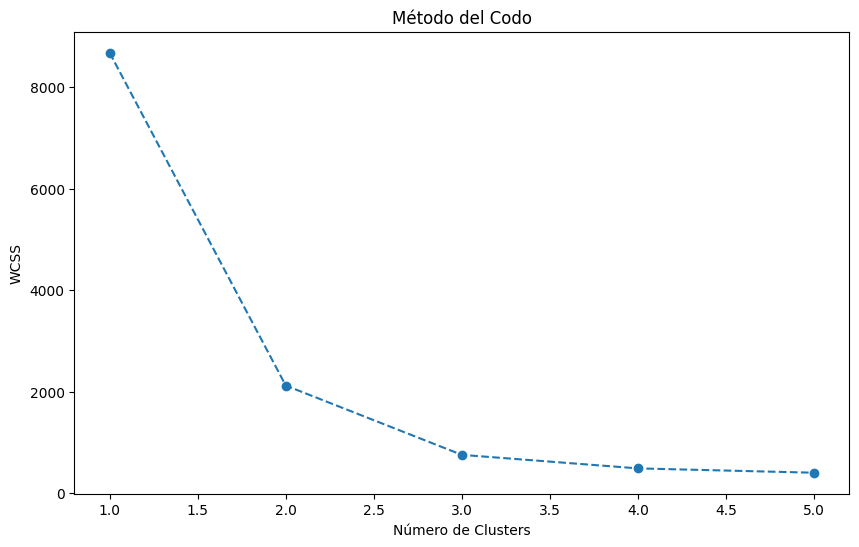

In [117]:
# Seleccionar las características para la segmentación
features = customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
## Tomar una muestra del 10% del dataset de clientes para reducir la carga computacional
#sampled_customer_data = customer_data.sample(frac=0.1, random_state=42)
#
## Seleccionar las características para la segmentación
#features_sampled = sampled_customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]
#
## Estandarizar los datos
#features_sampled_scaled = scaler.fit_transform(features_sampled)
#
## Determinar el número óptimo de clusters utilizando el método del codo con la muestra
#wcss_sampled = []
#for i in range(1, 6):
#    kmeans = KMeans(n_clusters=i, random_state=42)
#    kmeans.fit(features_sampled_scaled)
#    wcss_sampled.append(kmeans.inertia_)
#
## Graficar el método del codo con el rango reducido y la muestra
#plt.figure(figsize=(10, 6))
#plt.plot(range(1, 6), wcss_sampled, marker='o', linestyle='--')
#plt.title('Método del Codo (Muestra)')
#plt.xlabel('Número de Clusters')
#plt.ylabel('WCSS')
#plt.show()

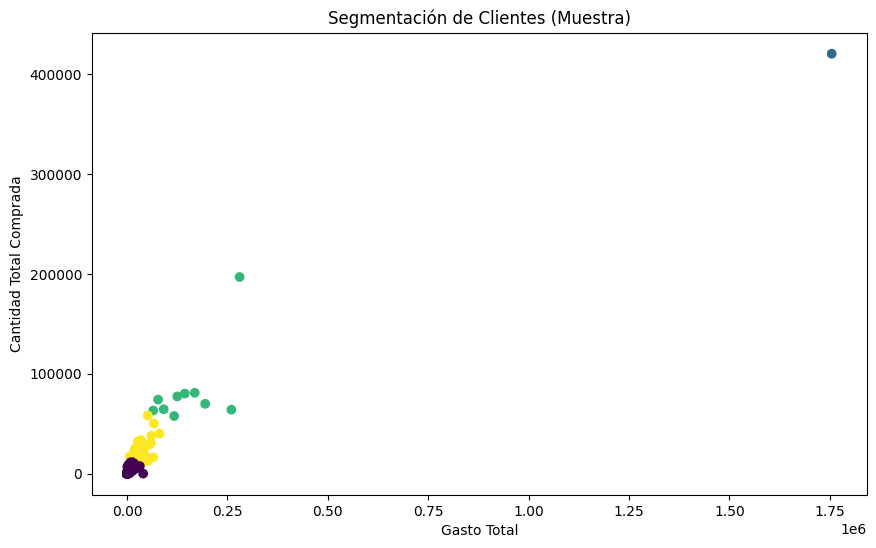

In [119]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=4, random_state=42)
features['CLUSTER'] = kmeans.fit_predict(features_scaled)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(features['TOTAL_SPENT'], features['TOTAL_QUANTITY'], c=features['CLUSTER'], cmap='viridis')
plt.title('Segmentación de Clientes (Muestra)')
plt.xlabel('Gasto Total')
plt.ylabel('Cantidad Total Comprada')
plt.show()

# Reporte de resultados